In [38]:
#计算Perason相关系数
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
#统计模型
import statsmodels.api as sm
#用来显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False 
#导入数据
df1 = pd.read_excel('去除重复数据眼底和临床.xlsx',sheet_name="眼底和临床清洗")
# df2 = pd.read_excel('D:\DataProcessingLocal\logic_regression\左右眼取均值和Gensini及临床指标.xlsx',sheet_name="临床资料")

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   病例号                   1479 non-null   object 
 1   age                   1446 non-null   float64
 2   gender                1446 non-null   float64
 3   吸烟状态（1从不吸烟2目前吸烟3已戒烟）  1446 non-null   float64
 4   饮酒（1从不饮酒2,目前饮酒3已戒酒）   1446 non-null   float64
 5   早发心血管病家族史（1是2否）       1479 non-null   int64  
 6   身高cm                  1311 non-null   float64
 7   体重kg                  1259 non-null   float64
 8   静息心率                  1326 non-null   float64
 9   收缩压                   1309 non-null   float64
 10  舒张压                   1309 non-null   float64
 11  高血压（0无1有）             1446 non-null   float64
 12  糖尿病（0无1有）             1446 non-null   float64
 13  总胆固醇                  1424 non-null   float64
 14  空腹血糖                  1425 non-null   float64
 15  Gensini              

In [40]:
#查看相关性矩阵
# print(df1.corr())
#查看y和其他指标的相关性
print(df1.corr()['y'])

age                     0.065875
gender                 -0.241637
吸烟状态（1从不吸烟2目前吸烟3已戒烟）    0.192072
饮酒（1从不饮酒2,目前饮酒3已戒酒）     0.075605
早发心血管病家族史（1是2否）              NaN
身高cm                    0.117156
体重kg                    0.124207
静息心率                   -0.031447
收缩压                    -0.002016
舒张压                    -0.046781
高血压（0无1有）               0.031090
糖尿病（0无1有）               0.010929
总胆固醇                   -0.168001
空腹血糖                    0.139409
Gensini                 1.000000
*肌酐(酶法)                 0.213971
*尿酸                     0.050294
颞上动静脉管径比               -0.098141
颞下动静脉管径比               -0.097975
颞上CRAE                 -0.072733
颞下CRAE                 -0.072354
颞上CRVE                 -0.017569
颞下CRVE                 -0.029156
动脉分形维数                 -0.060392
静脉分形维数                 -0.035454
动脉弯曲度                  -0.058984
静脉弯曲度                  -0.004180
y                       1.000000
Name: y, dtype: float64


In [43]:
#使用scipy中的函数计算各指标和y的相关系数及显著性
#不能有空值
df2 = df1.dropna(axis=0,subset = ["颞上动静脉管径比", "y"])   # 丢弃这两列中有缺失值的行 
#删除为0的值
indexNames = df2[ df2['颞上动静脉管径比'] == 0 ].index
# Delete these row indexes from dataFrame
df2.drop(indexNames , inplace=True)
# df2["y"].describe()
r,p_value = stats.pearsonr(df2['颞上动静脉管径比'],df2['y'])
print('颞上动静脉管径比相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))
r,p_value = stats.pearsonr(df2['颞上CRAE'],df2['y'])
print('颞上CRAE相关系数为{:.3f},p值为{:.5f}'.format(r,p_value))

颞上动静脉管径比相关系数为-0.067,p值为0.01192
颞上CRAE相关系数为-0.040,p值为0.13912


C:\Users\count\AppData\Local\Temp\ipykernel_2180\2265910500.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(indexNames , inplace=True)


Text(0.5, 1.0, '默认情况下')

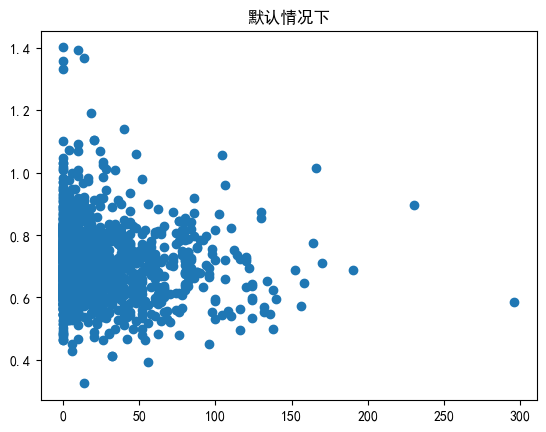

In [44]:
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.scatter(df2['y'],df2['颞上动静脉管径比'])
plt.title("默认情况下")